In [1]:
from fried import FRIED
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import colors

In [12]:
f = FRIED(mstar = 1.0, pah= 0.1, dust = True, fuv=1e3)

In [13]:
f.interp_hdyro_mdot()

In [14]:
f.extrap_hydro_mdot()

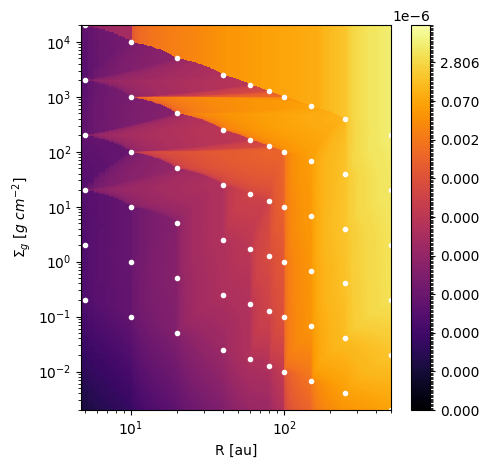

In [15]:
fig, ax =plt.subplots(1, 1, figsize=(5, 5))
bounds = np.logspace(-20, -4, 300)
cmap = mpl.colormaps['inferno'].resampled(len(bounds))
norm = colors.BoundaryNorm(bounds, cmap.N)
im1= ax.pcolormesh(f.r_new, f.sigma_new, f.mdot_new.T, cmap=cmap, norm=norm)#, locator=ticker.LogLocator())#, cmap='jet')
#, shading='nearest'
ax.set_xlabel('R [au]')
ax.set_ylabel(r'$\Sigma_g$ [$g~cm^{-2}$]')
ax.set_xscale('log')
ax.set_yscale('log')

sigma_ = f.sigma_hydro
r_out_uni = np.unique(f.data['Disc outer radius [au]'])
for i in range(sigma_.shape[0]):
    ax.scatter(r_out_uni[::-1], sigma_[i, :], color='white', marker='.')

cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
#cbar.set_ticks(bounds)
#cbar.set_ticklabels(bounds)